In [1]:
import pandas as pd

In [2]:
opt=pd.read_csv('./data/order_products__train.csv')
opp=pd.read_csv('./data/order_products__prior.csv')
products=pd.read_csv('./data/products.csv')

In [5]:
opt.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [3]:
opt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 4 columns):
order_id             1384617 non-null int64
product_id           1384617 non-null int64
add_to_cart_order    1384617 non-null int64
reordered            1384617 non-null int64
dtypes: int64(4)
memory usage: 42.3 MB


In [4]:
opp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
order_id             int64
product_id           int64
add_to_cart_order    int64
reordered            int64
dtypes: int64(4)
memory usage: 989.8 MB


In [6]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
product_id       49688 non-null int64
product_name     49688 non-null object
aisle_id         49688 non-null int64
department_id    49688 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


## 결측치 확인
- 3개의 데이터에 결측치가 없음을 볼 수 있다.

## 1. 가장 많이 판매되는 상품은?
### 1-1 ) OPP & OPT concat 하기
- order_products_train & order_products_prior은 주문 세부 내역을 분할한 것이기 때문에 concat를 실행   
   ⇒ order_info DataFrame을 생성  ( 33819106 개의 row, 4개의 column을 가짐 ) 

In [7]:
order_info = pd.concat([opt, opp], axis=0)

In [9]:
order_info.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [10]:
order_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33819106 entries, 0 to 32434488
Data columns (total 4 columns):
order_id             int64
product_id           int64
add_to_cart_order    int64
reordered            int64
dtypes: int64(4)
memory usage: 2.5 GB


In [11]:
order_info.to_csv("order_info.csv", header=True)

### 1-2 ) groupby () 통해 파생변수 생성 
- 각 product 별로 많이 팔리는 상품을 알아야 하므로 product_id에 대해 groupby, count 를 이용해 product_id 별 order_id갯수를 count해서 Total_orders 라는 파생변수 생성
-  49685의 row, 2개의 column 가짐

In [12]:
grouped = order_info.groupby("product_id")["order_id"].aggregate({'Total_orders': 'count'}).reset_index()

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  """Entry point for launching an IPython kernel.


In [13]:
grouped.head()

,product_id,Total_orders
0,1,1928
1,2,94
2,3,283
3,4,351
4,5,16


### 1-3 ) 제일 많이 구매되는 상품을 알아야하므로 total_orders가 높은 순서대로 정렬 수행

In [14]:
grouped=grouped.sort_values(by='Total_orders', ascending=False)

In [15]:
grouped.head() # 주문량이 많은 데이터부터 ~ 적은 데이터까지 

,product_id,Total_orders
24849,24852,491291
13173,13176,394930
21134,21137,275577
21900,21903,251705
47205,47209,220877


### 1-4 ) Merge 수행 
- 제일 많이 판매되는 상품명이 무엇인지 알기 위해 order_info 와 products 데이터 프레임을 product_id를 기준으로  inner join 함.
- 49685 rows × 5 columns

In [16]:
orderbest=pd.merge(grouped, products, how='inner')

In [17]:
orderbest.head()

,product_id,Total_orders,product_name,aisle_id,department_id
0,24852,491291,Banana,24,4
1,13176,394930,Bag of Organic Bananas,24,4
2,21137,275577,Organic Strawberries,24,4
3,21903,251705,Organic Baby Spinach,123,4
4,47209,220877,Organic Hass Avocado,24,4


In [23]:
# product 정보와 총 주문량 정리
orderbest.to_csv("orderbest.csv", header=False)

In [19]:
# type, null 값 확인
orderbest.isnull().sum()

product_id       0
Total_orders     0
product_name     0
aisle_id         0
department_id    0
dtype: int64

### 1-5 ) 주문량이 많은 상위 20개의 데이터 추출
- 상위 20개의 데이터만 추출해서 그래프 그릴 예정

In [20]:
best20=orderbest[:20]
best20

,product_id,Total_orders,product_name,aisle_id,department_id
0,24852,491291,Banana,24,4
1,13176,394930,Bag of Organic Bananas,24,4
2,21137,275577,Organic Strawberries,24,4
3,21903,251705,Organic Baby Spinach,123,4
4,47209,220877,Organic Hass Avocado,24,4
5,47766,184224,Organic Avocado,24,4
6,47626,160792,Large Lemon,24,4
7,16797,149445,Strawberries,24,4
8,26209,146660,Limes,24,4
9,27845,142813,Organic Whole Milk,84,16


### 1-6 ) 주문량 많은 상위 20개 데이터 시각화 ( histogram )

In [21]:
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set(font_scale=2)

C:\Users\admin\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


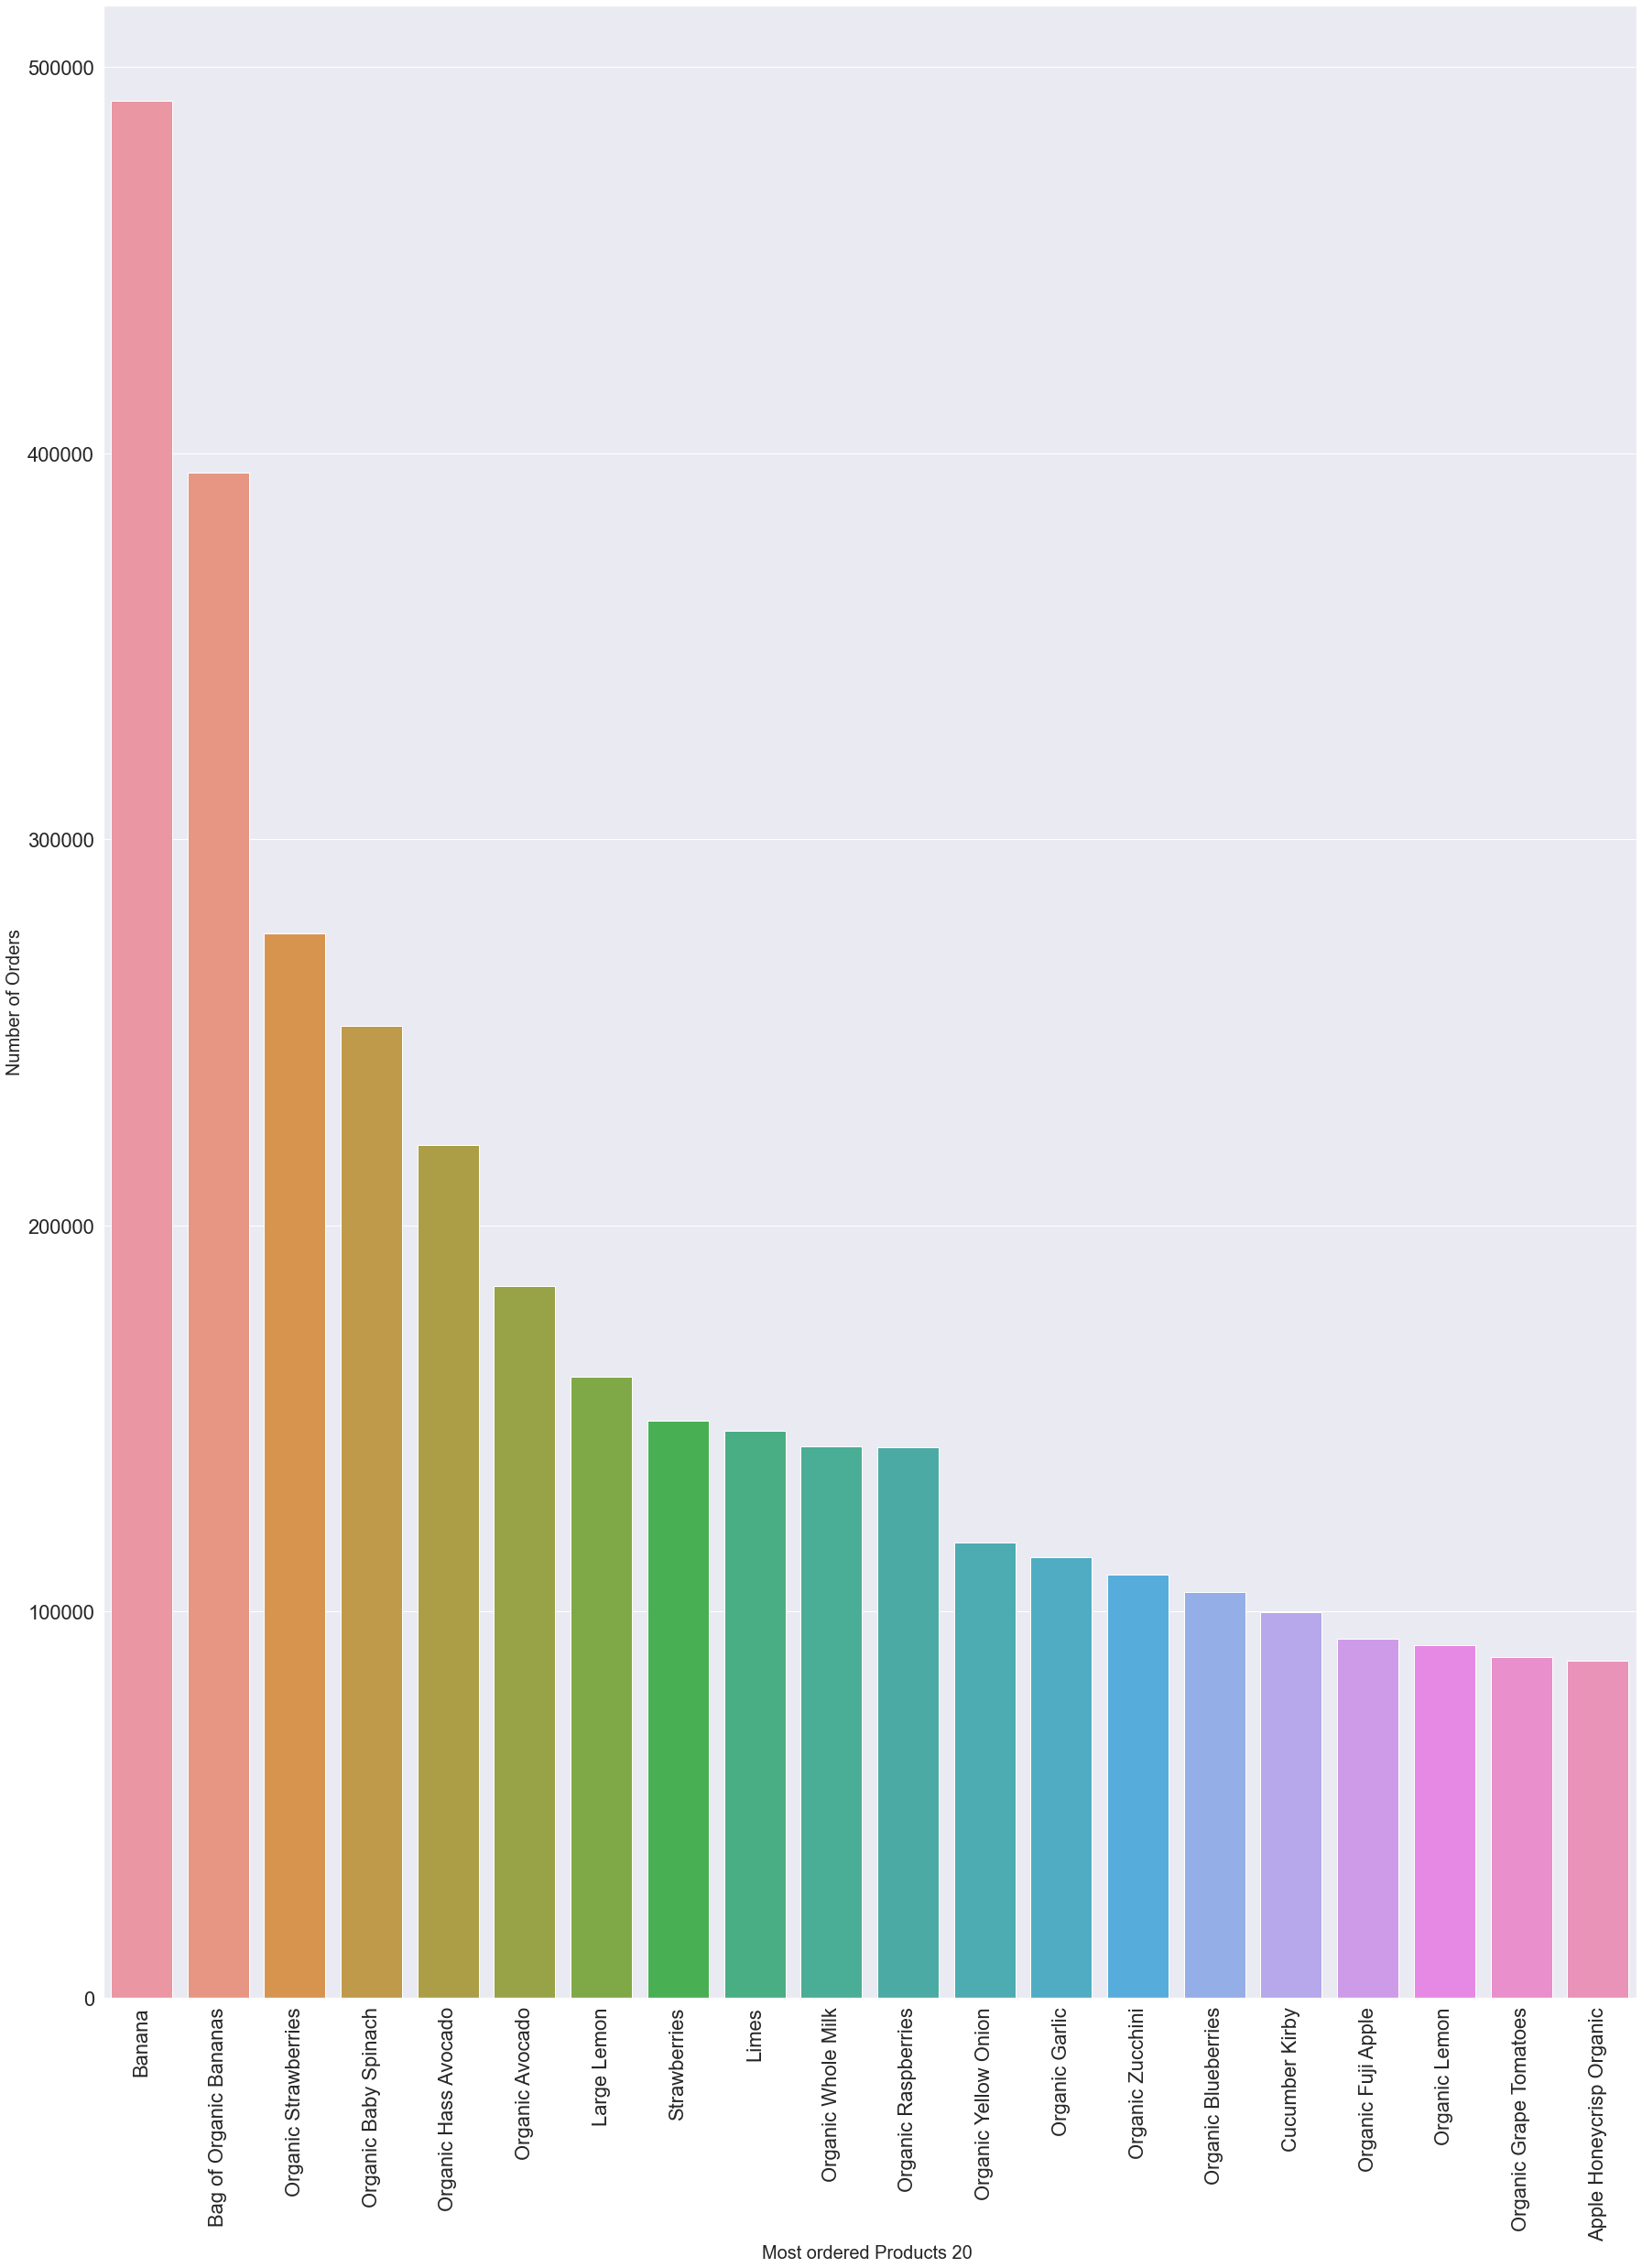

In [22]:
sns.set_style('darkgrid')
f, ax = plt.subplots(figsize=(30, 40))
plt.xticks(rotation='vertical')
sns.barplot(best20.product_name, best20.Total_orders)                 
plt.ylabel('Number of Orders', fontsize=20)
plt.xlabel('Most ordered Products 20 ', fontsize=20)
#plt.show()
plt.savefig('hypo1.png')

## 2. 어떤 카테고리가 제일 많이 팔릴까?
- 제품의 카테고리 정보가 있는 department DataFrame 이용
- 이전에 각 제품과 주문량의 정보가 있는 orderbest DataFrame 이용
### 2-1 ) orderbest DataFrame 정보 확인

In [23]:
orderbest.head()

,product_id,Total_orders,product_name,aisle_id,department_id
0,24852,491291,Banana,24,4
1,13176,394930,Bag of Organic Bananas,24,4
2,21137,275577,Organic Strawberries,24,4
3,21903,251705,Organic Baby Spinach,123,4
4,47209,220877,Organic Hass Avocado,24,4


In [24]:
orderbest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49685 entries, 0 to 49684
Data columns (total 5 columns):
product_id       49685 non-null int64
Total_orders     49685 non-null int64
product_name     49685 non-null object
aisle_id         49685 non-null int64
department_id    49685 non-null int64
dtypes: int64(4), object(1)
memory usage: 2.3+ MB


### 2-2 ) Department DataFrame과의 Merge 수행

In [25]:
departments= pd.read_csv('./data/departments.csv')

In [26]:
product_specific=pd.merge(orderbest, departments, how='inner')

In [27]:
product_specific.head()

,product_id,Total_orders,product_name,aisle_id,department_id,department
0,24852,491291,Banana,24,4,produce
1,13176,394930,Bag of Organic Bananas,24,4,produce
2,21137,275577,Organic Strawberries,24,4,produce
3,21903,251705,Organic Baby Spinach,123,4,produce
4,47209,220877,Organic Hass Avocado,24,4,produce


In [28]:
product_specific.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49685 entries, 0 to 49684
Data columns (total 6 columns):
product_id       49685 non-null int64
Total_orders     49685 non-null int64
product_name     49685 non-null object
aisle_id         49685 non-null int64
department_id    49685 non-null int64
department       49685 non-null object
dtypes: int64(4), object(2)
memory usage: 3.9+ MB


In [21]:
# product 정보, 주문량 , department 명 저장한 파일
product_specific.to_csv("product_specific.csv", header=False)

### 2-3 ) merge한 data에 대해서 속성, 결측치 파악
- 결측치는 존재하지 않음

In [29]:
product_specific.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49685 entries, 0 to 49684
Data columns (total 6 columns):
product_id       49685 non-null int64
Total_orders     49685 non-null int64
product_name     49685 non-null object
aisle_id         49685 non-null int64
department_id    49685 non-null int64
department       49685 non-null object
dtypes: int64(4), object(2)
memory usage: 3.9+ MB


In [30]:
len(product_specific['department'].unique())

21

In [31]:
len(departments)

21

### 2-4 ) groupby() 수행하여 요약변수 생성 (total_oreder_num)

In [32]:
department_product_number = product_specific.groupby("department")["Total_orders"].aggregate({'total_order_num': 'sum'}).reset_index()

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  """Entry point for launching an IPython kernel.


In [34]:
department_product_number

,department,total_order_num
0,alcohol,159294
1,babies,438743
2,bakery,1225181
3,beverages,2804175
4,breakfast,739069
5,bulk,35932
6,canned goods,1114857
7,dairy eggs,5631067
8,deli,1095540
9,dry goods pasta,905340


### 2-5 ) 제품의 대분류 별 총 주문 갯수를 오름차순으로 파악 : sort()

In [35]:
department_product_number=department_product_number.sort_values(by='total_order_num')

In [36]:
department_product_number

,department,total_order_num
5,bulk,35932
15,other,38086
14,missing,77396
18,pets,102221
0,alcohol,159294
12,international,281155
1,babies,438743
17,personal care,468693
4,breakfast,739069
13,meat seafood,739238


### 2-6 ) 제품의 대분류 별 제품의 판매 갯수를 알아보기 위해 시각화

C:\Users\admin\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


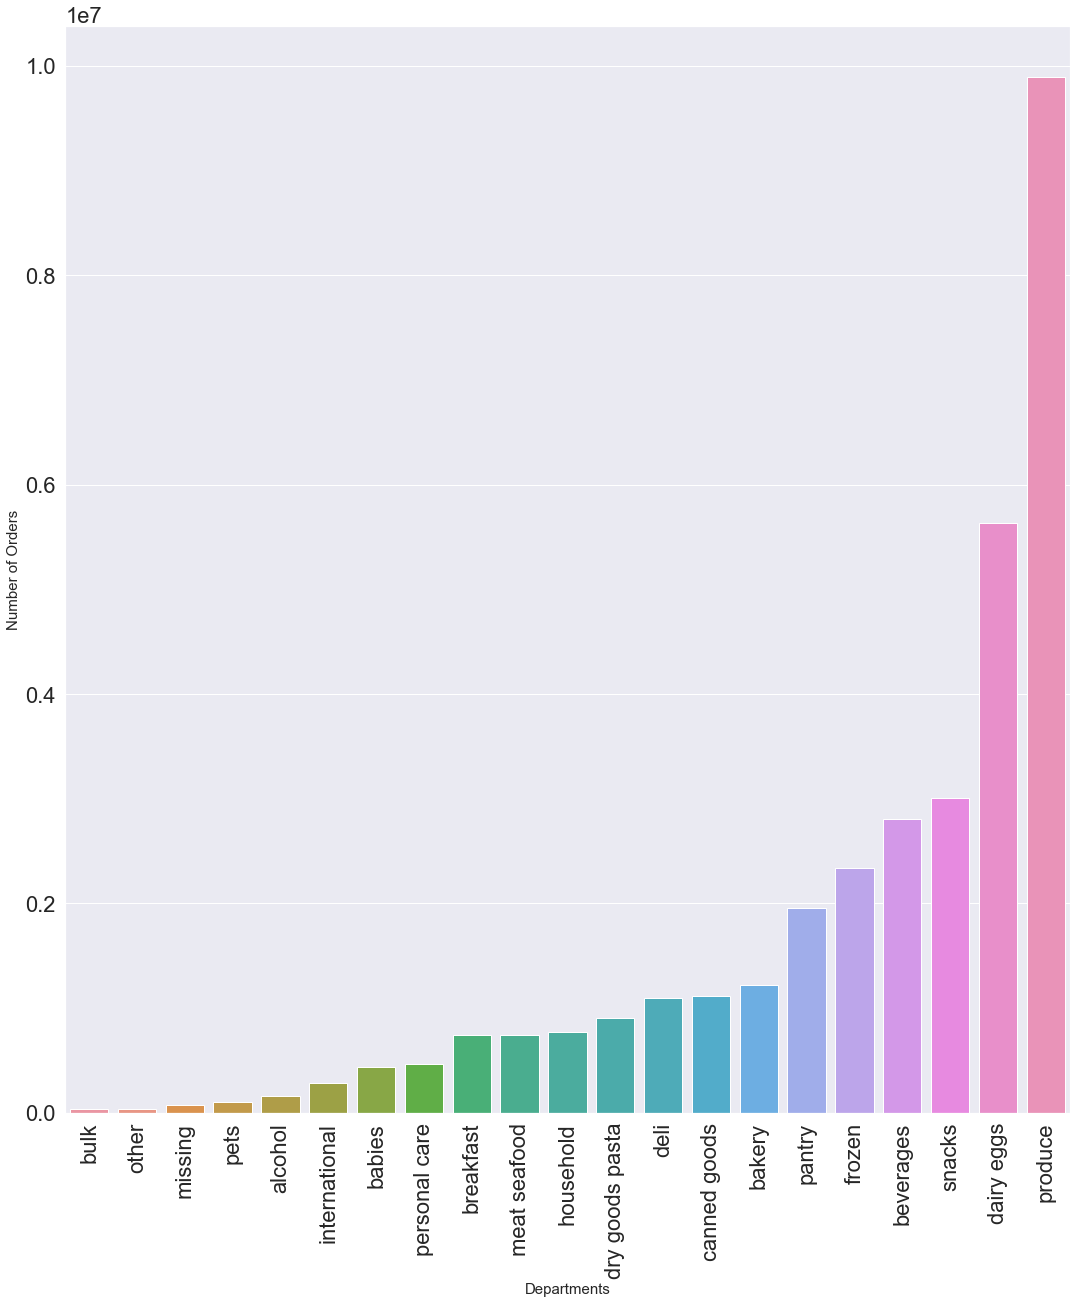

In [37]:
sns.set_style('darkgrid')
f, ax = plt.subplots(figsize=(18, 20))
plt.xticks(rotation='vertical')
sns.barplot(department_product_number.department, department_product_number.total_order_num)                 
plt.ylabel('Number of Orders', fontsize=15)
plt.xlabel('Departments', fontsize=15)
#plt.show()
plt.savefig('hypo2.png')

### 2-7 ) Result 
- 히스토그램을 확인해보면 produce 카테고리에 속한 제품들이 제일 많이 주문되었음을 알 수 있음
- 또한, bulk에 해당하는 상품들이 제일 적게 판매되었음을 알 수 있음

### 🚨 Warning!

- produce 카테고리의 주문량이 제일 많다고 해서 그 제품들이 인기가 많다고 보긴 어려움
    - 각 카테고리에 해당하는 제품의 갯수 자이가 있을 수 있기 때문!
- 각 카테고리 별 제품의 갯수 확인해보기

### 2-8 ) 각 카테고리 별 제품의 갯수 확인하기
- groupby사용해 요약변수 생성 ( product_num )

In [38]:
product_specific.head()

,product_id,Total_orders,product_name,aisle_id,department_id,department
0,24852,491291,Banana,24,4,produce
1,13176,394930,Bag of Organic Bananas,24,4,produce
2,21137,275577,Organic Strawberries,24,4,produce
3,21903,251705,Organic Baby Spinach,123,4,produce
4,47209,220877,Organic Hass Avocado,24,4,produce


In [39]:
department_cnt = product_specific.groupby("department")["product_id"].aggregate({'product_num': 'count'}).reset_index()

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  """Entry point for launching an IPython kernel.


In [40]:
department_cnt

,department,product_num
0,alcohol,1054
1,babies,1081
2,bakery,1516
3,beverages,4364
4,breakfast,1114
5,bulk,38
6,canned goods,2092
7,dairy eggs,3449
8,deli,1322
9,dry goods pasta,1858


In [70]:
department_cnt=department_cnt.sort_values(by='product_num')

In [41]:
department_cnt

,department,product_num
0,alcohol,1054
1,babies,1081
2,bakery,1516
3,beverages,4364
4,breakfast,1114
5,bulk,38
6,canned goods,2092
7,dairy eggs,3449
8,deli,1322
9,dry goods pasta,1858


C:\Users\admin\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


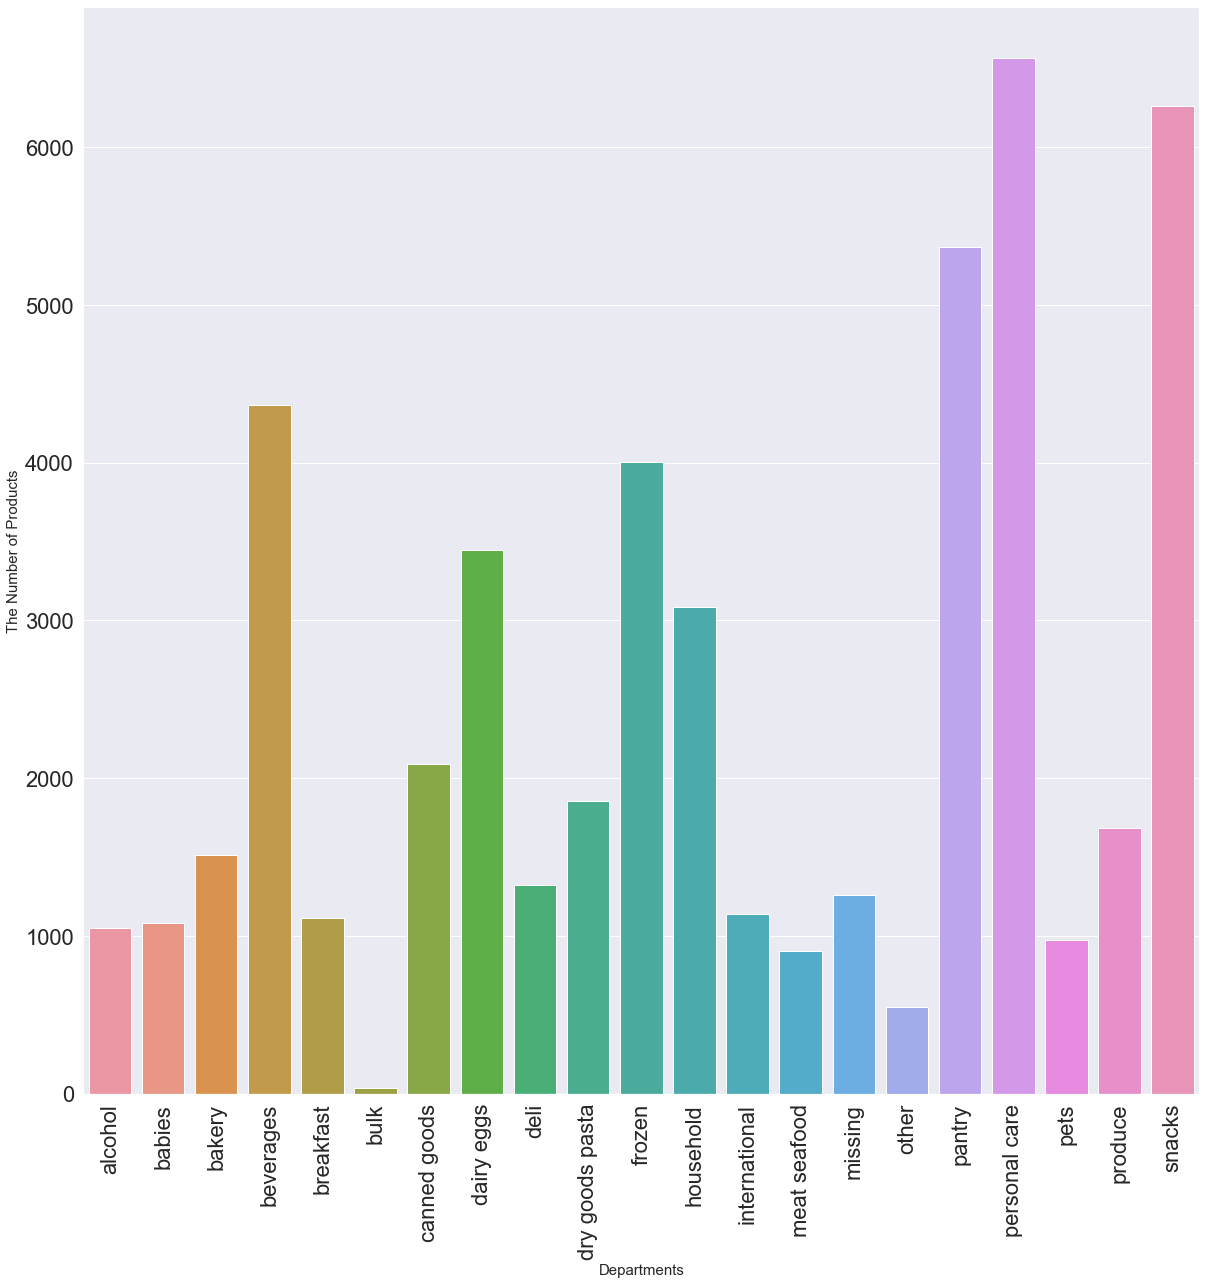

In [42]:
sns.set_style('darkgrid')
f, ax = plt.subplots(figsize=(20, 20))
plt.xticks(rotation='vertical')
sns.barplot(department_cnt.department, department_cnt.product_num)                 
plt.ylabel('The Number of Products', fontsize=15)
plt.xlabel('Departments', fontsize=15)
#plt.show()
plt.savefig('hypo3.png')

### Result
- personal care 카테고리의 제품이 6563개로 제일 많고,  snacks 카테고리에 포함된 제품의 갯수가 6264개로 두번째로 많음
- 또한, bulk 카테고리가 38개로 제일 적은 상품을 가지고 있음을 볼 수 있음
- 각 카테고리의 상품 갯수 대비 판매량을 비교하여 Instacart Market의 제일 인기있는 상품 카테고리를 알아보자.

## 3. 상품 카테고리에 속하는 상품 갯수 대비 주문량 비교

In [43]:
# 상품 카테고리 별 상품의 갯수
department_cnt.head()

,department,product_num
0,alcohol,1054
1,babies,1081
2,bakery,1516
3,beverages,4364
4,breakfast,1114


In [44]:
department_cnt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
department     21 non-null object
product_num    21 non-null int64
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [45]:
# 상품 카테고리 별 주문의 갯수
department_product_number.head()

,department,total_order_num
5,bulk,35932
15,other,38086
14,missing,77396
18,pets,102221
0,alcohol,159294


In [46]:
department_product_number.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 5 to 19
Data columns (total 2 columns):
department         21 non-null object
total_order_num    21 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [50]:
orderbest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49685 entries, 0 to 49684
Data columns (total 5 columns):
product_id       49685 non-null int64
Total_orders     49685 non-null int64
product_name     49685 non-null object
aisle_id         49685 non-null int64
department_id    49685 non-null int64
dtypes: int64(4), object(1)
memory usage: 3.5+ MB


### 3-1) 2개의 DataFrame을 Merge
- 상품 갯수 대비 주문량을 비교하기 위해 department_cnt & department_product_number를 'department'를 기준으로 Merge 수행
- 그 결과를 department_product DataFrame에 저장

In [47]:
# merge 
department_product=pd.merge(department_cnt,department_product_number)

In [48]:
department_product.head()

,department,product_num,total_order_num
0,alcohol,1054,159294
1,babies,1081,438743
2,bakery,1516,1225181
3,beverages,4364,2804175
4,breakfast,1114,739069


In [49]:
department_product.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 0 to 20
Data columns (total 3 columns):
department         21 non-null object
product_num        21 non-null int64
total_order_num    21 non-null int64
dtypes: int64(2), object(1)
memory usage: 1.3+ KB


### 3-2)  상품 갯수 대비 주문량에 대한 파생변수 생성 & 오름차순 정렬

In [92]:
department_product['product_per_order']=department_product['total_order_num']/department_product['product_num']

In [93]:
department_product=department_product.sort_values(by='product_per_order')

In [94]:
department_product.head()

,department,product_num,total_order_num,product_per_order
8,missing,1258,77396,61.523052
1,other,548,38086,69.500000
20,personal care,6563,468693,71.414445
3,pets,972,102221,105.165638
4,alcohol,1054,159294,151.132827


C:\Users\admin\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


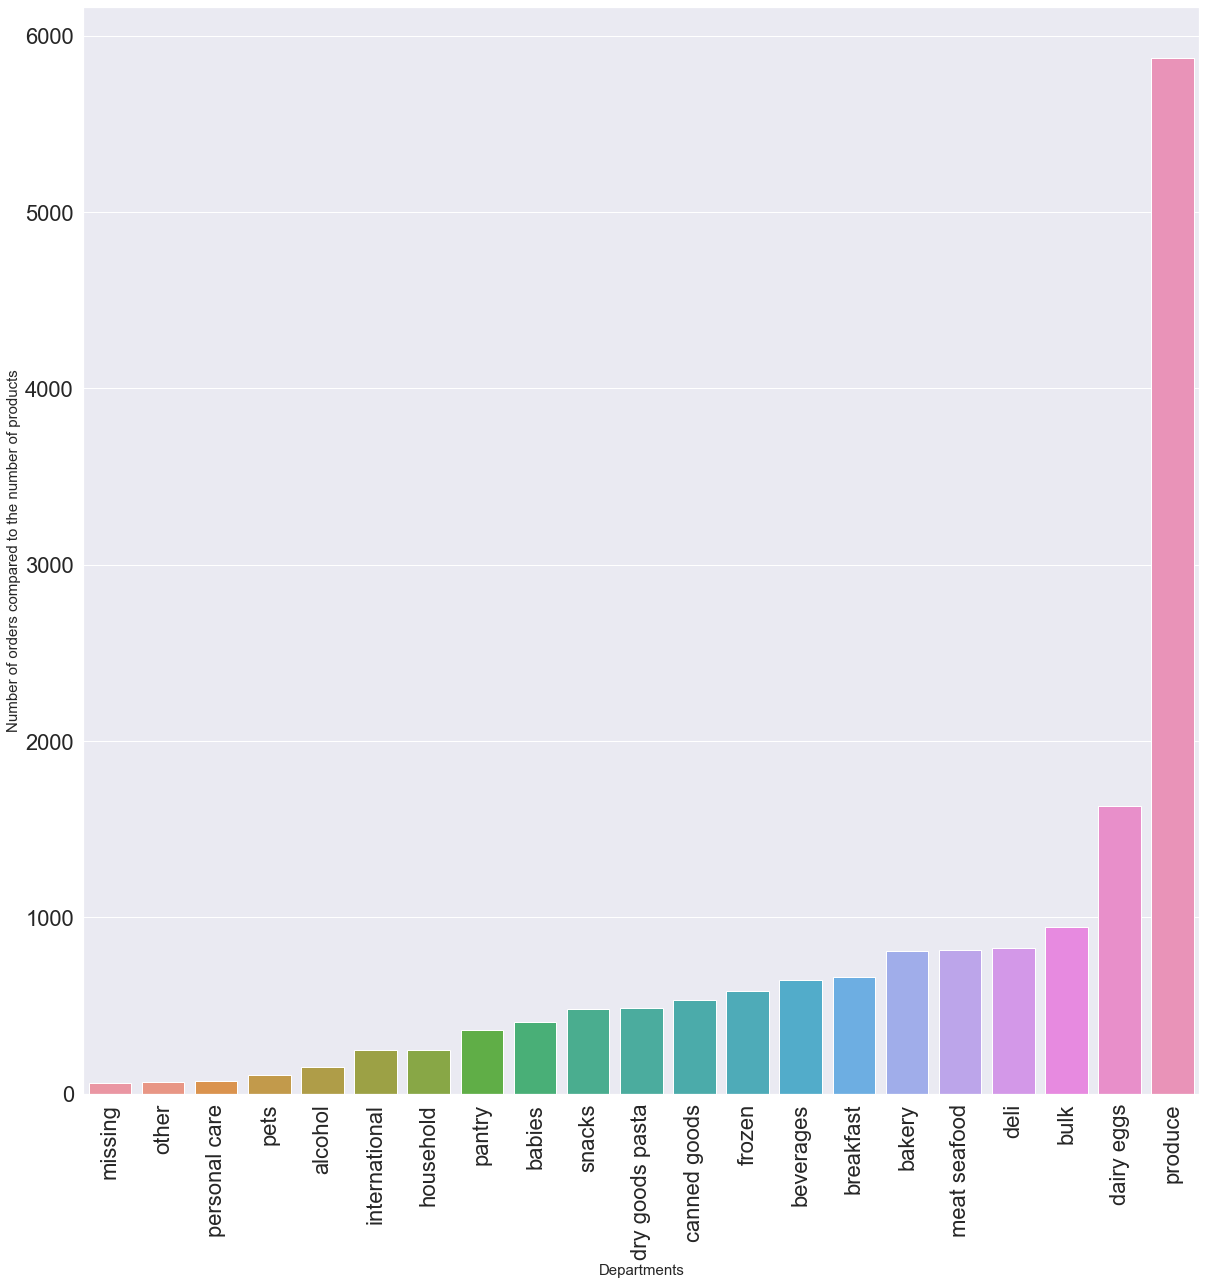

In [95]:
sns.set_style('darkgrid')
f, ax = plt.subplots(figsize=(20, 20))
plt.xticks(rotation='vertical')
sns.barplot(department_product.department, department_product.product_per_order)                 
plt.ylabel('Number of orders compared to the number of products', fontsize=15)
plt.xlabel('Departments', fontsize=15)
#plt.show()
plt.savefig('hypo8.png')

### Result
- 각 상품의 갯수 대비 주문량에 대한 히스토그램 결과를 보면 produce 카테고리의 상품이 상품의 갯수에 비해 주문되는 양이 제일 많다는 것을 알 수 있음
- 위의 히스토그램들과 비교해봤을 때, bulk 카테고리에 속하는 상품의 갯수가 제일 적지만 상품 갯수 대비 주문량은 3위임을 알 수 있음.
- 이는 다른 카테고리의 상품에 비해 produce 카테고리의 상품이 고객들에게 인기가 많다는 것을 의미함. 그러므로  produce 카테고리의 상품들에 대해 할인을 하는 등의 마케팅을 진행 할 수 있음.